# GET THE DATA

In [ ]:
## Memuat data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pandas as pd

path = "/content/drive/My Drive/archive/"
df = pd.read_csv(path + 'train.csv')
pd.set_option("display.max_columns",100)

Mounted at /content/drive


In [ ]:
## Menampilkan info data (58592 x 44)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
## Mengecek missing values: DATA TIDAK MEMPUNYAI MISSING VALUES
print(df.isnull().any())

policy_id                           False
policy_tenure                       False
age_of_car                          False
age_of_policyholder                 False
area_cluster                        False
population_density                  False
make                                False
segment                             False
model                               False
fuel_type                           False
max_torque                          False
max_power                           False
engine_type                         False
airbags                             False
is_esc                              False
is_adjustable_steering              False
is_tpms                             False
is_parking_sensors                  False
is_parking_camera                   False
rear_brakes_type                    False
displacement                        False
cylinder                            False
transmission_type                   False
gear_box                          

In [ ]:
## Mengecek Imbalanced Data: DATA TIDAK SEIMBANG
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [ ]:
## Mengecek Duplikat data: DATA UNIK
df.duplicated().sum()

0

In [ ]:
#MENGETAHUI DATA UNIK PADA DATA KATEGORIK TERTENTU
print(df["engine_type"].unique())
print(df["max_power"].unique())
print(df["max_torque"].unique())
print(df["transmission_type"].unique())
print(df["engine_type"].unique())

['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']
['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm']
['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm']
['Manual' 'Automatic']
['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']


In [ ]:
# Memisahkan Nm dan Rpm pada Max_Torque dan Bhp dan Rpm pada Max_Power 

def data_preprocessor(df):

    #Clean max_torque and max_power cols
    df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
    
    df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    #Drop original cols
    df.drop(["max_torque","max_power"],axis=1,inplace=True)

data_preprocessor(df)

In [ ]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500.0,40.36,6000.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500.0,40.36,6000.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,113.0,4400.0,88.50,6000.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,91.0,4250.0,67.06,5500.0


In [ ]:
# PENGUBAHAN DATA KATEGORIK MENJADI NUMERIK

df['is_speed_alert'].replace(['Yes', 'No'], [1, 0], inplace=True)

df['is_day_night_rear_view_mirror'].replace(['Yes', 'No'], [1, 0], inplace=True)

df['is_power_steering'].replace(['Yes', 'No'], [1, 0], inplace=True)

df['is_power_door_locks'].replace(['Yes', 'No'], [1, 0], inplace=True)

df['is_rear_window_defogger'].replace(['Yes', 'No'], [1, 0], inplace=True)

df['is_rear_window_wiper'].replace(['Yes', 'No'], [1, 0], inplace=True)

df['steering_type'].replace(['Manual', 'Electric', 'Power'], [0, 1, 2], inplace=True)

df['rear_brakes_type'].replace(['Drum', 'Disc'], [1, 0], inplace=True)

df['is_parking_sensors'].replace(['Yes', 'No'], [1, 0], inplace=True)

df['is_adjustable_steering'].replace(['Yes', 'No'], [1, 0], inplace=True)

df['is_ecw'].replace(['Yes', 'No'],[1, 0], inplace=True)

df['is_driver_seat_height_adjustable'].replace(['Yes', 'No'],[1, 0], inplace=True)

df['is_central_locking'].replace(['Yes', 'No'],[1, 0], inplace=True)

df['is_brake_assist'].replace(['Yes', 'No'],[1, 0], inplace=True)

df['is_rear_window_washer'].replace(['Yes', 'No'],[1, 0], inplace=True)

df['is_front_fog_lights'].replace(['Yes', 'No'],[1, 0], inplace=True)

df['transmission_type'].replace(['Manual','Automatic'],[0, 1], inplace=True)

df['is_parking_camera'].replace(['Yes', 'No'],[1, 0], inplace=True)

df['is_tpms'].replace(['Yes', 'No'],[1, 0], inplace=True)

df['is_esc'].replace(['Yes', 'No'],[1, 0], inplace=True)

df['segment'].replace(['A', 'B1','B2','C1','C2','Utility'], [0, 1, 2, 3, 4, 5], inplace=True)

df['fuel_type'].replace(['CNG', 'Petrol', 'Diesel'], [0, 1, 2], inplace=True)

df['model'].replace(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

df['area_cluster'].replace(['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10',
                            'C11','C12','C13','C14','C15','C16','C17','C18','C19','C20','C21','C22'],
                           [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], inplace = True)

df['engine_type'].replace(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe', '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq',
                           'K Series Dual jet', '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B', '1.5 Turbocharged Revotron'],
                          [0,1,2,3,4,5,6,7,8,9,10], inplace=True)

In [ ]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,6.672174,18826.858667,1.763722,1.938644,3.437773,0.955625,3.437773,3.137066,0.314053,0.606329,0.239248,0.959500,0.390634,0.760752,1162.355851,3.626963,0.348358,5.245443,1.551150,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,0.579055,0.289425,0.289425,0.350133,0.549171,0.724246,0.724246,0.979366,0.585251,0.380308,0.724246,0.993805,1.759950,0.063968,134.450937,3533.176031,78.976765,5307.163094
std,0.414156,0.056721,0.122886,4.513651,17660.174792,1.136988,1.566329,2.593467,0.804748,2.593467,1.832641,0.464142,0.488568,0.426628,0.197131,0.487897,0.426628,266.304786,0.483616,0.476454,0.430353,0.537268,0.228061,311.457119,112.089135,79.62227,212.423085,0.493715,0.453499,0.453499,0.477016,0.497581,0.446897,0.446897,0.142158,0.492683,0.485467,0.446897,0.078467,1.389576,0.244698,73.146794,725.960661,27.699259,916.770819
min,0.002735,0.000000,0.288462,0.000000,290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,796.000000,3.000000,0.000000,5.000000,0.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,1750.000000,40.360000,3600.000000
25%,0.210250,0.020000,0.365385,2.000000,6112.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,796.000000,3.000000,0.000000,5.000000,1.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,60.000000,2750.000000,40.360000,4000.000000
50%,0.573792,0.060000,0.451923,7.000000,8794.000000,1.000000,2.000000,3.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1197.000000,4.000000,0.000000,5.000000,2.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,113.000000,3500.000000,88.500000,6000.000000
75%,1.039104,0.110000,0.548077,9.000000,27003.000000,3.000000,4.000000,5.000000,2.000000,5.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1493.000000,4.000000,1.000000,5.000000,2.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,200.000000,4400.000000,97.890000,6000.000000
max,1.396641,1.000000,1.000000,21.000000,73430.000000,5.000000,5.000000,10.000000,2.000000,10.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [ ]:
#Cek apakah masih ada data kategorik selain policy_id: TIDAK ADA

import numpy as np

categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)

Categorical Features in DataSet: 1
Index(['policy_id'], dtype='object')
Numerical Features in DataSet: 45
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_torque_Nm',
       'max_torque_rpm', 'max_power_bhp', 'max_power_rpm'],
      dtype='object')


<ipython-input-11-a726a3d835eb>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = df.select_dtypes(include =[np.object])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

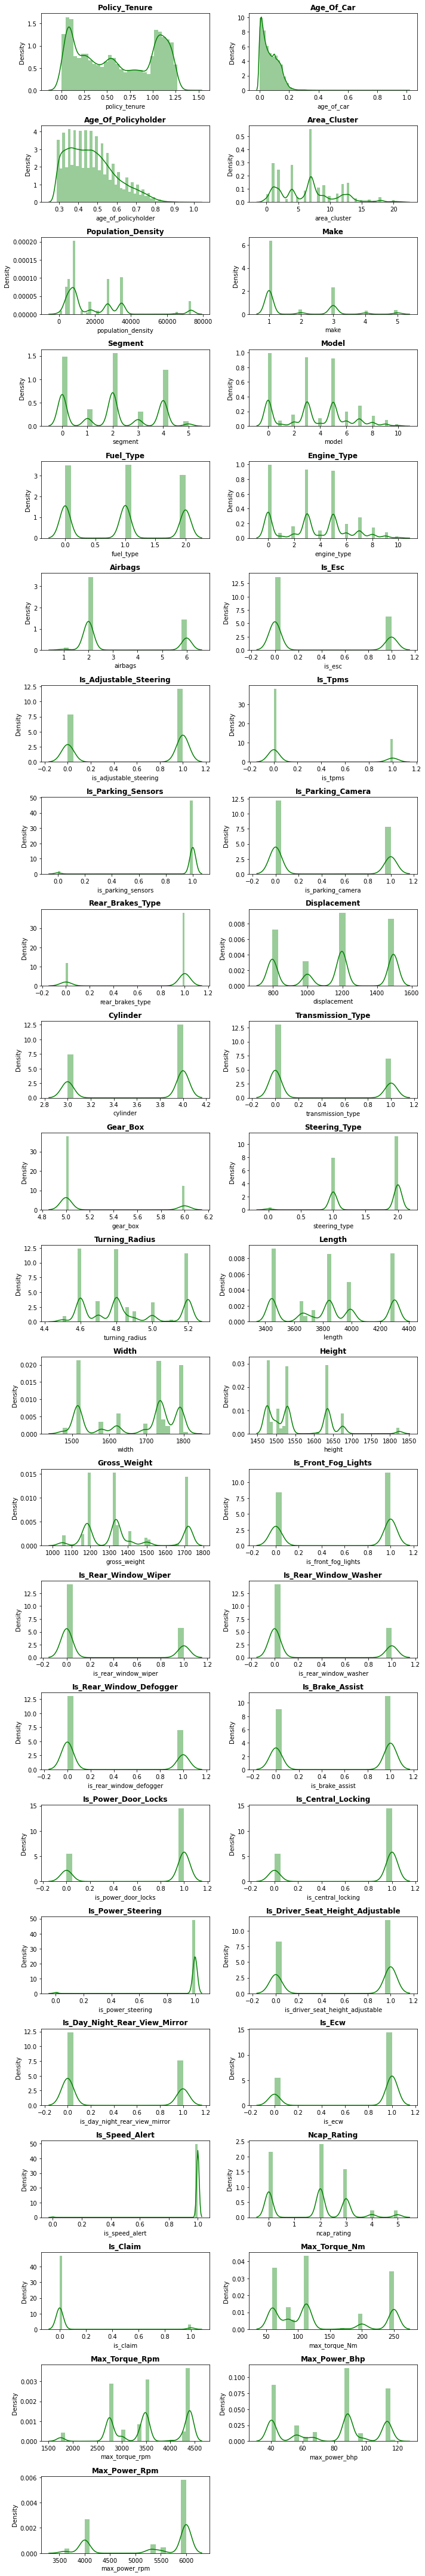

In [ ]:
#PERSEBARAN DATA NUMERIK

import matplotlib.pyplot as plt
import seaborn as sns 
target = [i for i in numerical.columns]
plt.figure(figsize=(10,60))
for n,column in enumerate(target):
    plot=plt.subplot(23,2,n+1)
    sns.distplot(df[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

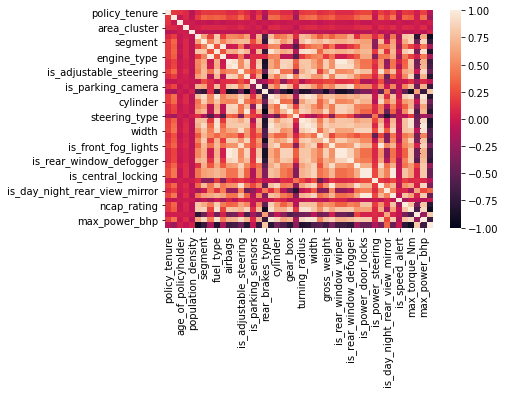

In [ ]:
## CEK KORELASI: 
import seaborn as sns
correlation = df.select_dtypes("number").drop("is_claim", axis=1).corr()
sns.heatmap(correlation);

In [ ]:
#MENDEFINISIKAN VARIABEL KOVARIAT DAN VARIABEL RESPON
X = df.drop(["is_claim","policy_id"],axis=1)
y = df["is_claim"]

In [ ]:
X 

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,0,2,0,0,0,1,0,1,796,3,0,5,2,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0
1,0.672619,0.02,0.375000,1,27003,1,0,0,0,0,2,0,0,0,1,0,1,796,3,0,5,2,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0
2,0.841110,0.02,0.384615,2,4076,1,0,0,0,0,2,0,0,0,1,0,1,796,3,0,5,2,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0
3,0.900277,0.11,0.432692,3,21622,1,3,1,1,1,2,1,1,0,1,1,1,1197,4,1,5,1,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0
4,0.596403,0.11,0.634615,4,34738,2,0,2,1,2,2,0,0,0,0,1,1,999,3,1,5,1,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,7,8794,2,0,2,1,2,2,0,0,0,0,1,1,999,3,1,5,1,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0
58588,1.199642,0.02,0.519231,13,7788,1,0,0,0,0,2,0,0,0,1,0,1,796,3,0,5,2,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0
58589,1.162273,0.05,0.451923,4,34738,1,0,0,0,0,2,0,0,0,1,0,1,796,3,0,5,2,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0
58590,1.236307,0.14,0.557692,7,8794,1,2,5,1,5,2,0,1,0,1,0,1,1197,4,0,5,1,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

In [ ]:
#Standardisasi nilai X
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
X

array([[-0.23028345, -0.34244685,  1.42255728, ..., -0.04569988,
        -1.39415626,  0.75574266],
       [ 0.14818765, -0.87135928, -0.7683621 , ..., -0.04569988,
        -1.39415626,  0.75574266],
       [ 0.55502223, -0.87135928, -0.69011498, ..., -0.04569988,
        -1.39415626,  0.75574266],
       ...,
       [ 1.33048996, -0.34244685, -0.14238513, ..., -0.04569988,
        -1.39415626,  0.75574266],
       [ 1.50925096,  1.24429045,  0.7183332 , ...,  1.1940473 ,
         0.34381122,  0.75574266],
       [-1.17545276, -0.87135928, -0.22063226, ..., -1.07882253,
         1.24456503, -1.42584627]])

In [ ]:
#PILIH 20 FITUR TERBAIK BERDASARKAN ANOVA F-VALUE
from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(k=20).fit(X,y)
X_selected = kbest.transform(X)

In [ ]:
#Sampling Method untuk Mengatasi Imbalanced Data
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTEN
sm = SMOTEN(sampling_strategy="minority",k_neighbors=20,n_jobs=-1)
X_res, y_res = sm.fit_resample(X_selected, y)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


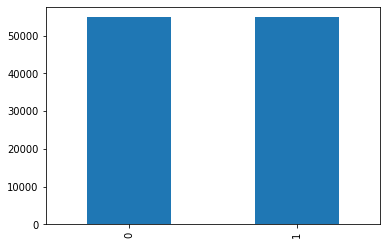

In [ ]:
#CEK KESEIMBANGAN DATA

y_res.value_counts().plot.bar()

In [ ]:
X_res

array([[-0.23028345, -0.34244685,  1.42255728, ..., -1.62062204,
         0.07895573, -1.39415626],
       [ 0.14818765, -0.87135928, -0.7683621 , ..., -1.62062204,
         0.07895573, -1.39415626],
       [ 0.55502223, -0.87135928, -0.69011498, ..., -1.62062204,
         0.07895573, -1.39415626],
       ...,
       [-1.14260919,  0.36276973,  0.01410911, ...,  0.61704702,
         0.07895573,  1.24456503],
       [-1.22160089, -0.87135928,  0.09235623, ..., -1.62062204,
         0.07895573, -1.39415626],
       [-1.40202928, -1.22396757, -0.53362074, ..., -1.62062204,
         0.07895573, -1.39415626]])

In [ ]:
#SPLIT THE DATA (TRAIN : TEST = 80 : 20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42,stratify=y_res)

In [ ]:
#PEMILIHAN MODEL XGBOOST

from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [ ]:
#EVALUASI HASIL XGBOOST TANPA HYPERPARAMETER TUNING
from sklearn.metrics import classification_report
print(classification_report(y_test,xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     10969
           1       0.85      0.91      0.87     10969

    accuracy                           0.87     21938
   macro avg       0.87      0.87      0.87     21938
weighted avg       0.87      0.87      0.87     21938



In [ ]:
#CETAK NILAI LUAS AREAS DI BAWAH KURVA ROC AUC XGBOOST
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,xgb.predict(X_test)))

0.8703619290728416


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


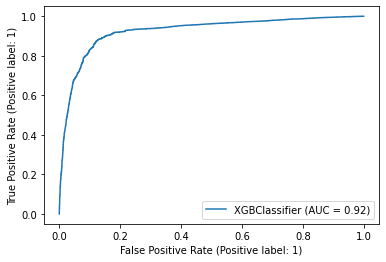

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb, X_test, y_test)
plt.show()

In [ ]:
#PEMILIHAN MODEL ADABOOST

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
#EVALUASI HASIL ADABOOST TANPA HYPERPARAMETER TUNING
print(classification_report(y_test,ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83     10969
           1       0.80      0.91      0.85     10969

    accuracy                           0.84     21938
   macro avg       0.85      0.84      0.84     21938
weighted avg       0.85      0.84      0.84     21938



In [ ]:
#CETAK NILAI LUAS AREAS DI BAWAH KURVA  ROC AUC ADABOOST
print(roc_auc_score(y_test,ada.predict(X_test)))

0.8415078858601514


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


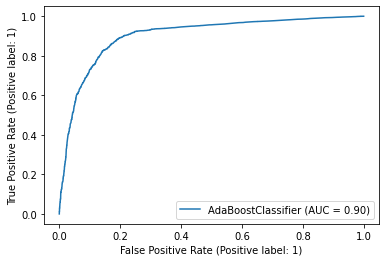

In [ ]:
plot_roc_curve(ada, X_test, y_test)
plt.show()

In [ ]:
#PEMILIHAN MODEL DECISION TREE

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#EVALUASI HASIL DECISION TREE TANPA HYPERPARAMETER TUNING
print(classification_report(y_test,dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10969
           1       0.91      0.94      0.93     10969

    accuracy                           0.92     21938
   macro avg       0.92      0.92      0.92     21938
weighted avg       0.92      0.92      0.92     21938



In [ ]:
#CETAK NILAI LUAS AREAS DI BAWAH KURVA  ROC AUC DECISION TREE
print(roc_auc_score(y_test,dtc.predict(X_test)))

0.9244233749658126


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


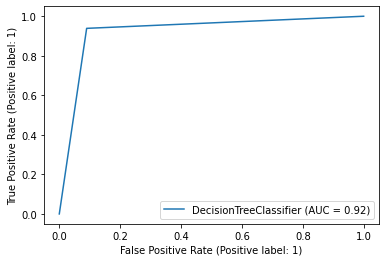

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtc, X_test, y_test)
plt.show()

#HYPERPARAMETER TUNING

##1. XGBoost
   - GridSearchCV
   - BayesianSearchCV

In [ ]:
#HYPERPARAMETER TUNING XGBOOST DENGAN GridSearchCV
from sklearn.model_selection import GridSearchCV

ratio = float(np.sum(y_train == 0)/np.sum(y_train == 1))
param_grid = {
              'max_depth':range(3,10),
            }
grid = GridSearchCV(XGBClassifier(scale_pos_weight = ratio), cv = 5, scoring='roc_auc', param_grid = param_grid)
grid.fit(X_train, y_train)
xgb_grid = grid.best_estimator_

print(roc_auc_score(y_test, xgb_grid.predict(X_test)))

print("Best:%s "%(grid.best_params_))

0.9412890874282067
Best:{'max_depth': 9} 


In [ ]:
print(classification_report(y_test,xgb_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10969
           1       0.95      0.93      0.94     10969

    accuracy                           0.94     21938
   macro avg       0.94      0.94      0.94     21938
weighted avg       0.94      0.94      0.94     21938



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


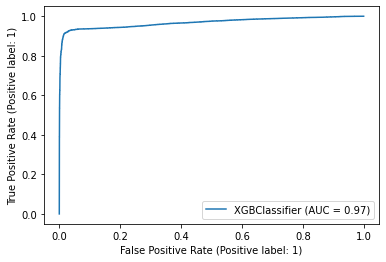

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb_grid, X_test, y_test)
plt.show()

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 9.0 MB/s 


In [ ]:
#HYPERPARAMETER TUNING XGBOOST DENGAN BayesSearchCV
from skopt import BayesSearchCV

ratio = float(np.sum(y_train == 0)/np.sum(y_train == 1))
params = {
          'max_depth':[3,4,5,6,7,8,9,10],
          'min_child_weight': [4,5,6,7,8,9,10],
          'gamma':[0.5,1,1.5,2,5],
          'eta':[0.1,0.2],
          'subsample': [0.5,0.6,0.7,0.8,0.9,1],
          'colsample_bytree': [0.5,0.6,0.7,0.8,0.9,1],
        }
bayes = BayesSearchCV(XGBClassifier(scale_pos_weight = ratio), search_spaces = params, cv = 5, n_iter = 10)
bayes.fit(X_train,y_train)
xgb_bayes = bayes.best_estimator_
print(roc_auc_score(y_test, xgb_bayes.predict(X_test)))

print("Best:%s "%(bayes.best_params_))

0.9431579907010667
Best:OrderedDict([('colsample_bytree', 0.7), ('eta', 0.18870365937868216), ('gamma', 1.5), ('max_depth', 10), ('min_child_weight', 6), ('subsample', 0.8)]) 


In [ ]:
print(classification_report(y_test, xgb_bayes.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10969
           1       0.95      0.93      0.94     10969

    accuracy                           0.94     21938
   macro avg       0.94      0.94      0.94     21938
weighted avg       0.94      0.94      0.94     21938



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


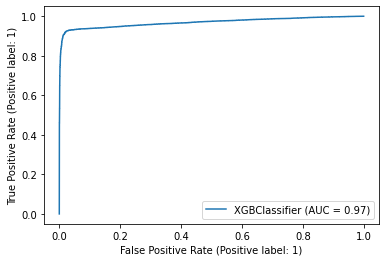

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb_bayes, X_test, y_test)
plt.show()

##2. AdaBoost
   - GridSearchCV
   - BayesianSearchCV

In [ ]:
#HYPERPARAMETER TUNING ADABOOST DENGAN GridSearchCV
from sklearn.model_selection import GridSearchCV

model = AdaBoostClassifier()
param_grid1 = {
              'learning_rate': [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2],
              'n_estimators': [10, 50, 100]
            }
grid3 = GridSearchCV(estimator = model, param_grid = param_grid1,
                     n_jobs=-1, cv = 5, scoring='accuracy')
grid3.fit(X_train, y_train)
ada_grid = grid3.best_estimator_

print(roc_auc_score(y_test, ada_grid.predict(X_test)))

In [ ]:
print(classification_report(y_test, ada_grid.predict(X_test)))

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(ada_grid, X_test, y_test)
plt.show()

##3. DECISION TREE
   - GridSearchCV
   - BayesianSearchCV

In [ ]:
#HYPERPARAMETER TUNING DecisionTree DENGAN GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid2 = {
              'max_depth': range(3,10),
            }
grid2 = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced'),
                     cv = 5, scoring='roc_auc', param_grid = param_grid2)
grid2.fit(X_train, y_train)
dct_grid = grid2.best_estimator_

print(roc_auc_score(y_test, dct_grid.predict(X_test)))

In [ ]:
print(classification_report(y_test, dct_grid.predict(X_test)))

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dct_grid, X_test, y_test)
plt.show()